# PROBLEM SATEMENT-1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

# IMPORTING LIBRARIES

In [459]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib  inline
import scipy 
from scipy.cluster import hierarchy as sch
from sklearn.metrics import silhouette_score as sil
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as agg
from sklearn.cluster import DBSCAN as dbs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# IMPORTING CSV FILE

In [460]:
ls


 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\cluster

01/04/2023  10:38 AM    <DIR>          .
01/04/2023  10:38 AM    <DIR>          ..
01/03/2023  06:13 PM    <DIR>          .ipynb_checkpoints
01/04/2023  10:38 AM           501,989 CLUSTER-7.ipynb
11/29/2022  03:32 PM             1,328 crime_data.csv
11/29/2022  03:32 PM           268,963 EastWestAirlines.xlsx
11/29/2022  03:32 PM             1,560 Problem_Statement(Airlines).txt
11/29/2022  03:32 PM               389 ProblemSatement(crime_data).txt
               5 File(s)        774,229 bytes
               3 Dir(s)  23,966,232,576 bytes free


In [461]:
crime=pd.read_csv("crime_data.csv")

In [462]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [463]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [464]:
crime.head().info

<bound method DataFrame.info of    Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6>

In [465]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


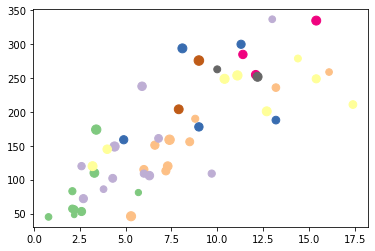

In [525]:
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],crime["Rape"],cmap=plt.cm.Accent)

In [466]:
crime.duplicated().sum()

0

In [467]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

# FEATURE ENGINEERING

In [468]:
crime1=crime.iloc[:,1:]

In [469]:
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# NORMALIZING DATA

In [470]:
from sklearn.preprocessing import normalize
crime_norm=pd.DataFrame(normalize(crime1),columns=crime1.columns)
crime_norm.head()



,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [471]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [472]:
crime_norm.shape

(50, 4)

# Visualization

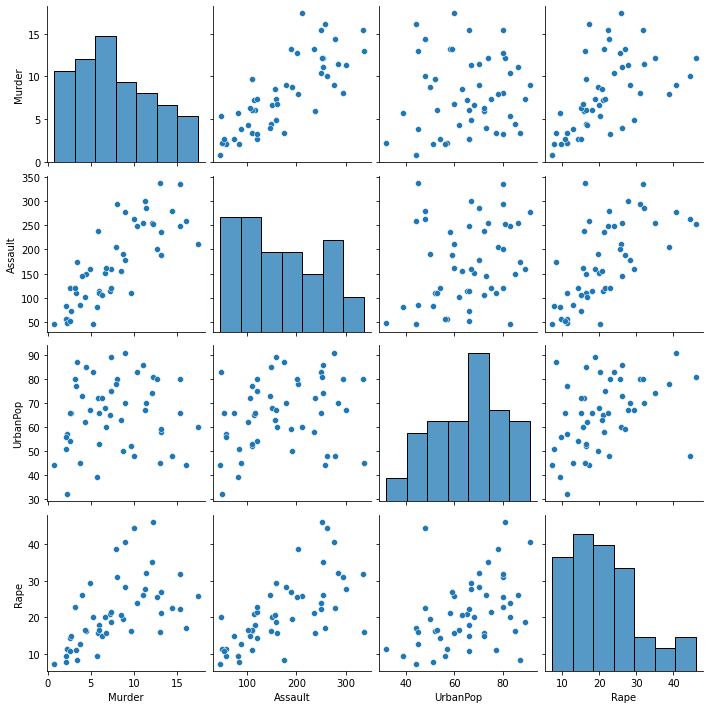

In [473]:
sn.pairplot(crime)

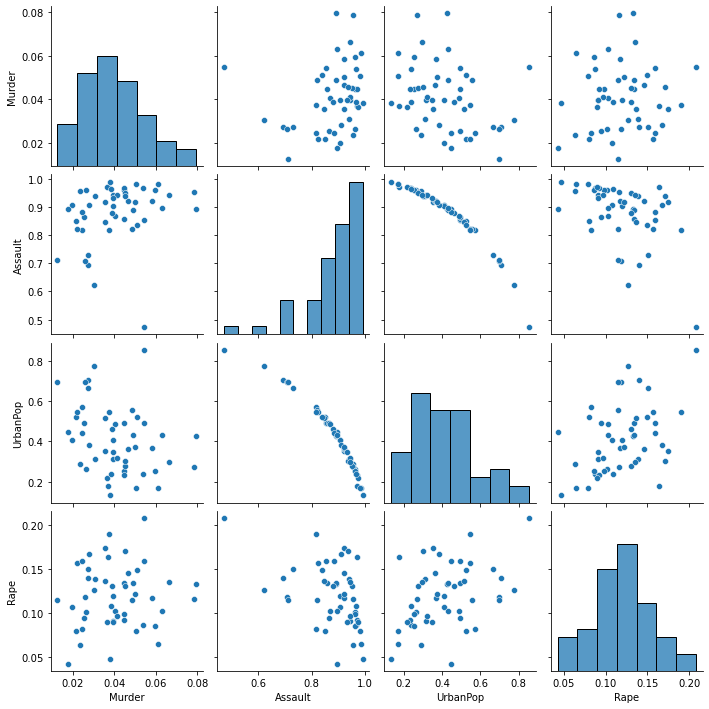

In [474]:
sn.pairplot(crime_norm)

#  1.Hierarchical Clustering

# Create dendrogram of normalization data for all methods


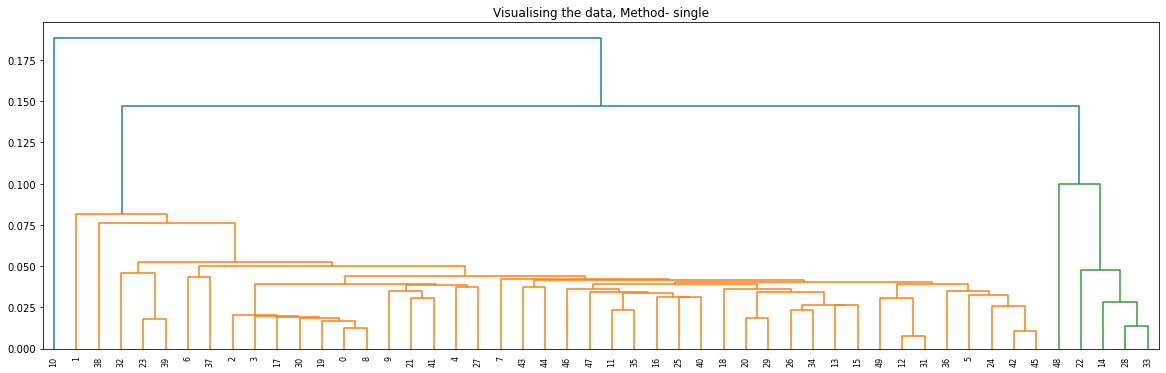

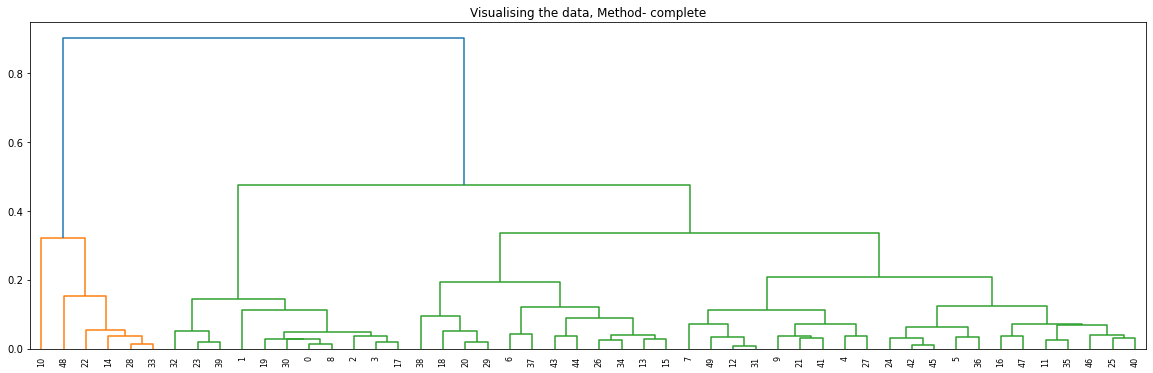

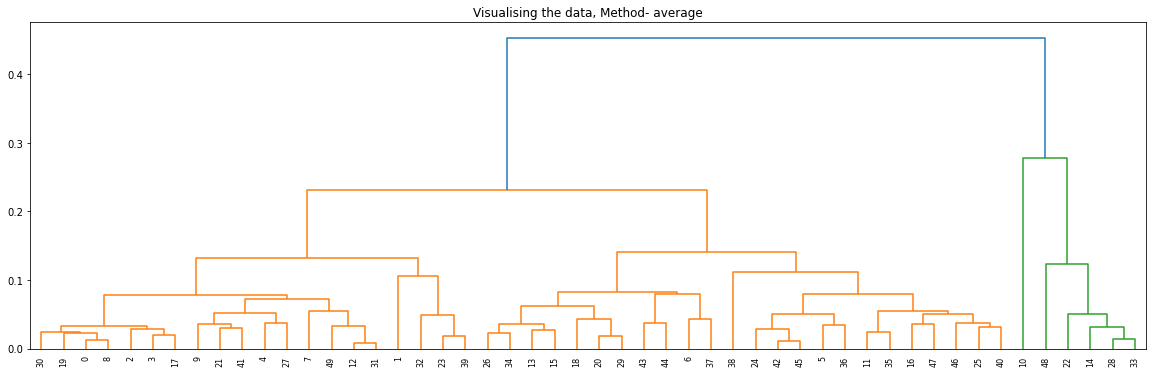

In [475]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(crime_norm, method = methods,optimal_ordering=False))

In [476]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean',linkage = linkages)
        y = hc.fit_predict(crime_norm)
        sc=sil(crime_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = single, Sc score = 0.5941710401826306
Clusters = 2, linkage = average, Sc score = 0.6037116221173207
Clusters = 2, linkage = complete, Sc score = 0.6037116221173207

Clusters = 3, linkage = single, Sc score = 0.5431936191625951
Clusters = 3, linkage = average, Sc score = 0.5431936191625951
Clusters = 3, linkage = complete, Sc score = 0.4086143225005802

Clusters = 4, linkage = single, Sc score = 0.4966896266306985
Clusters = 4, linkage = average, Sc score = 0.5191395036557489
Clusters = 4, linkage = complete, Sc score = 0.4120453539053912

Clusters = 5, linkage = single, Sc score = 0.09816536549640326
Clusters = 5, linkage = average, Sc score = 0.4635175688797507
Clusters = 5, linkage = complete, Sc score = 0.4115211805628645

Clusters = 6, linkage = single, Sc score = -0.1557461215334895
Clusters = 6, linkage = average, Sc score = 0.431603196741559
Clusters = 6, linkage = complete, Sc score = 0.3892142583931346

Clusters = 7, linkage = single, Sc score = -0.059

# Conclusion

In [477]:
first_model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')
y=first_model.fit_predict(crime_norm)

In [478]:
crime['cluster id']=y

In [479]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1


In [480]:
crime.groupby(["cluster id"])["Unnamed: 0"].apply(lambda x:tuple(x))


cluster id
0    (Colorado, Connecticut, Idaho, Indiana, Kansas...
1    (Alabama, Alaska, Arizona, Arkansas, Californi...
2                                            (Hawaii,)
3    (Iowa, Minnesota, New Hampshire, North Dakota,...
Name: Unnamed: 0, dtype: object

In [481]:
first_model.labels_

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 3, 1], dtype=int64)

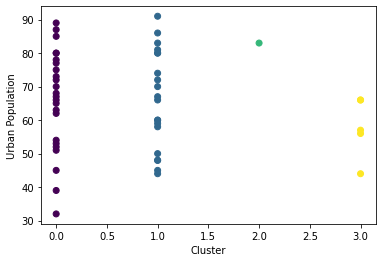

In [482]:
plt.scatter(crime['cluster id'],crime['UrbanPop'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Urban Population')
plt.show()

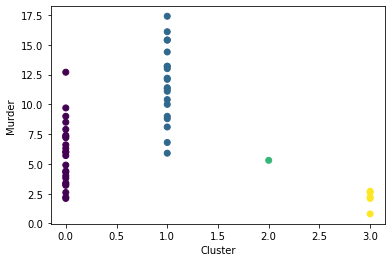

In [483]:
plt.scatter(crime['cluster id'],crime['Murder'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Murder ')
plt.show()

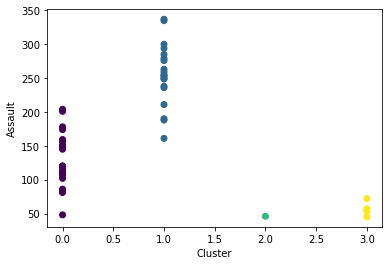

In [484]:
plt.scatter(crime['cluster id'],crime['Assault'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Assault')
plt.show()

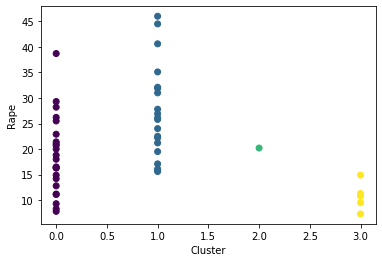

In [485]:
plt.scatter(crime['cluster id'],crime['Rape'],c=first_model.labels_)
plt.xlabel('Cluster')
plt.ylabel('Rape')
plt.show()

# 2.K-Means

In [486]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(crime_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(crime_norm)
    silscore.append(sil(crime_norm,y))

C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\phoneclicker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

In [487]:
iner


[0.7540963759591797,
 0.3278478050693132,
 0.22760245765174872,
 0.16395152491640727,
 0.12172205031883883,
 0.10188607971993463,
 0.08678951146202626,
 0.07622070587268549]

In [488]:
silscore

[0.5240686325107649,
 0.5429805198778498,
 0.4658225178189756,
 0.4693605748149834,
 0.4206035628530432,
 0.3937638694041954,
 0.38722331323749437,
 0.363239412074187]

Text(0.5, 1.0, 'Silhoutte Score')

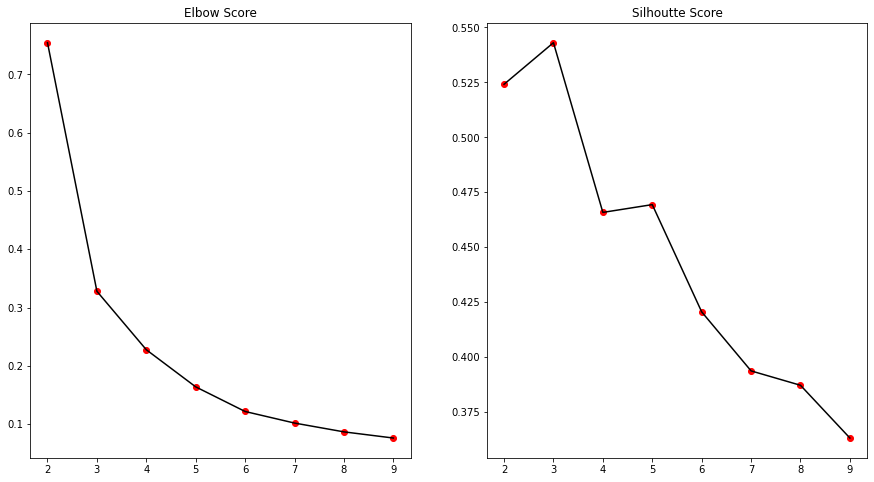

In [489]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

# Conclusion
Optimal number of clustering we get is 3 in K-Means by seeing silhoutte score and elbow method

# 3. DBscan

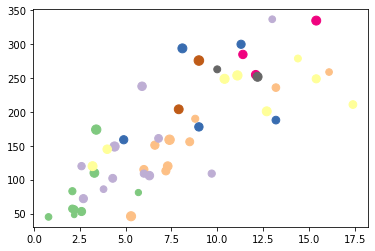

In [548]:
#plt.figure(figsize=5)
plt.scatter(crime["Murder"],crime["Assault"],crime["UrbanPop"],crime["Rape"],cmap=plt.cm.Accent)

In [520]:
from sklearn.cluster import DBSCAN


In [544]:
dbs=DBSCAN(eps=1, min_samples=2)

In [545]:
labels=dbs.fit_predict(crime1)

# Optimal Number Of Cluster

In [546]:
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

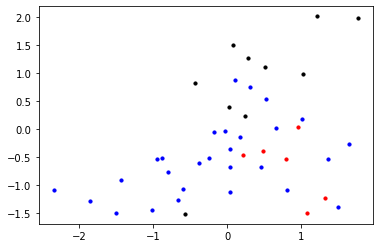

In [551]:
plt.scatter(crime1[labels==-1,0],crime1[labels==-1,1],s=10,c="black")
plt.scatter(crime1[labels==0,1],crime1[labels==0,2],s=10,c="red")
plt.scatter(crime1[labels==1,2],crime1[labels==1,3],s=10,c="blue")

# PROBLEM SATEMENT-2

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [552]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\cluster

01/04/2023  11:44 AM    <DIR>          .
01/04/2023  11:44 AM    <DIR>          ..
01/03/2023  06:13 PM    <DIR>          .ipynb_checkpoints
01/04/2023  11:44 AM           345,943 CLUSTER-7.ipynb
11/29/2022  03:32 PM             1,328 crime_data.csv
11/29/2022  03:32 PM           268,963 EastWestAirlines.xlsx
11/29/2022  03:32 PM             1,560 Problem_Statement(Airlines).txt
11/29/2022  03:32 PM               389 ProblemSatement(crime_data).txt
               5 File(s)        618,183 bytes
               3 Dir(s)  23,961,640,960 bytes free


# Importing CSV File

In [553]:
air=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

# EDA

In [554]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [555]:
air.shape

(3999, 12)

In [556]:
air.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                5 non-null      int64
 1   Balance            5 non-null      int64
 2   Qual_miles         5 non-null      int64
 3   cc1_miles          5 non-null      int64
 4   cc2_miles          5 non-null      int64
 5   cc3_miles          5 non-null      int64
 6   Bonus_miles        5 non-null      int64
 7   Bonus_trans        5 non-null      int64
 8   Flight_miles_12mo  5 non-null      int64
 9   Flight_trans_12    5 non-null      int64
 10  Days_since_enroll  5 non-null      int64
 11  Award?             5 non-null      int64
dtypes: int64(12)
memory usage: 608.0 bytes


In [557]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [558]:
air.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Column Renaming

In [559]:
air=air.rename(columns={'ID#':'ID','Award?':'Award'})

In [560]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Feature Engineering

In [561]:
air_mod=air.drop(["ID","Award"],axis=1)

In [565]:
air_mod

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


# Normalizing Data

In [567]:
air_norm=pd.DataFrame(normalize(air_mod),columns=air_mod.columns)
air_norm.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718


# 1.Hierarchical Clustering

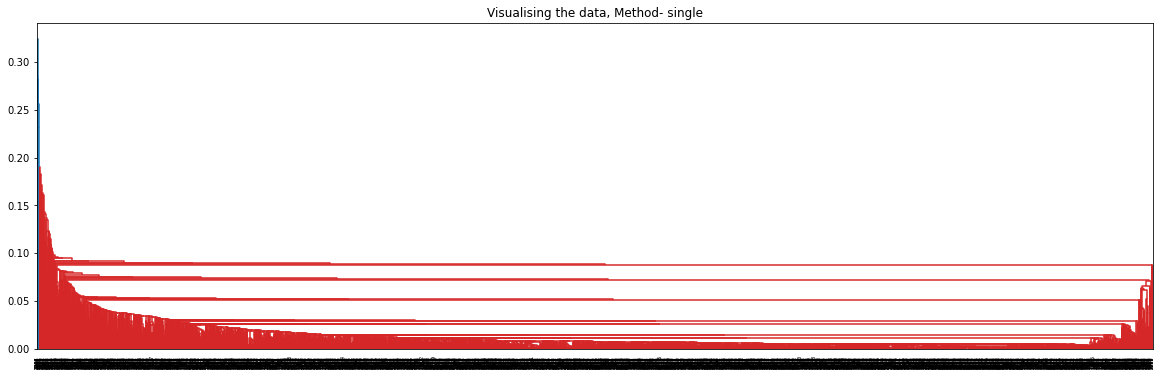

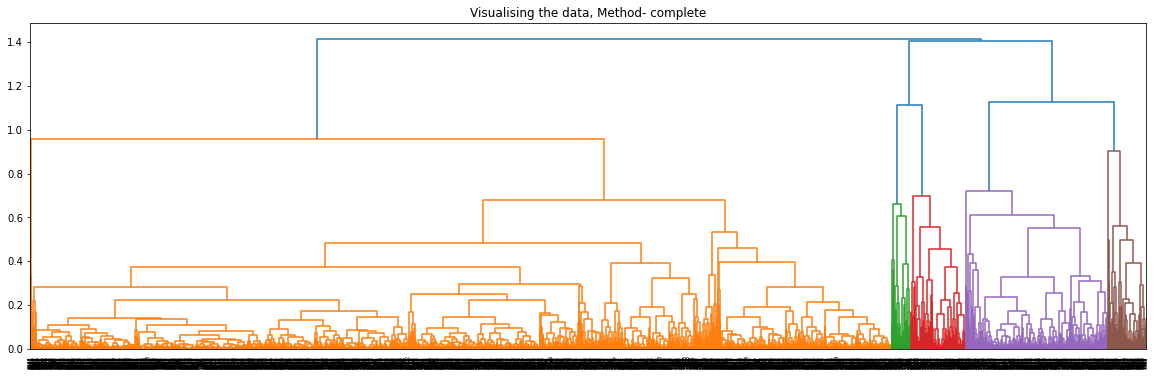

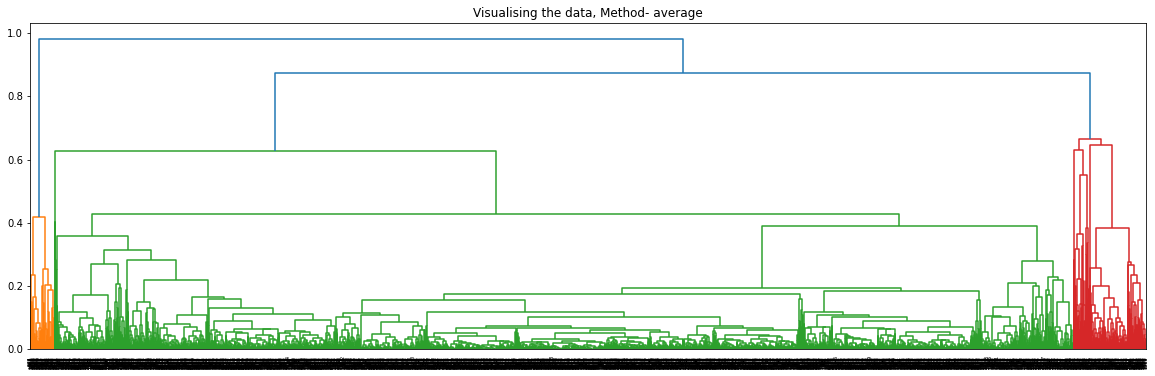

In [568]:
for methods in ['single','complete','average']: 
     plt.figure(figsize =(20, 6))
     plt.title('Visualising the data, Method- {}'.format(methods)) 
     Dendrogram = sch.dendrogram(sch.linkage(air_norm, method = methods,optimal_ordering=False))

In [569]:
nc=[2,3,4,5,6,7,8,9]

for i in nc:
    for linkages in ['single','average','complete']:
        hc = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean',linkage = linkages)
        y = hc.fit_predict(air_norm)
        sc=sil(air_norm,y)
        print('Clusters = {}, linkage = {}, Sc score = {}'.format(i,linkages,sc))
    print()

Clusters = 2, linkage = single, Sc score = 0.6414807597188987
Clusters = 2, linkage = average, Sc score = 0.6199075368947913
Clusters = 2, linkage = complete, Sc score = 0.5414238117493092

Clusters = 3, linkage = single, Sc score = 0.4980808146158188
Clusters = 3, linkage = average, Sc score = 0.6023264073883706
Clusters = 3, linkage = complete, Sc score = 0.5757037645688333

Clusters = 4, linkage = single, Sc score = 0.45957880996099165
Clusters = 4, linkage = average, Sc score = 0.5734105133284101
Clusters = 4, linkage = complete, Sc score = 0.5322356437626531

Clusters = 5, linkage = single, Sc score = 0.42528433822274675
Clusters = 5, linkage = average, Sc score = 0.5687644465781913
Clusters = 5, linkage = complete, Sc score = 0.5081755801489433

Clusters = 6, linkage = single, Sc score = 0.40955584890813773
Clusters = 6, linkage = average, Sc score = 0.5654812187325654
Clusters = 6, linkage = complete, Sc score = 0.5072814131618931

Clusters = 7, linkage = single, Sc score = 0.31

# optimal number of cluster is-3

# COCLUSION

In [598]:
first_model1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y=first_model1.fit_predict(air_norm)

In [599]:
air['cluster id']=y

In [600]:
np.unique(air["cluster id"])

array([0, 1, 2], dtype=int64)

In [601]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [621]:
air.groupby(["cluster id"])["ID"].apply(lambda x:tuple(x))


cluster id
0    (16, 42, 82, 83, 88, 94, 103, 108, 112, 166, 1...
1    (40, 52, 144, 182, 213, 220, 282, 401, 412, 41...
2    (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name: ID, dtype: object

In [604]:
first_model1.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

# 2. K-Means

In [614]:
#Finding optimal number of cluster for normalize data
#using Elbow method and silhoutte method

nc=[2,3,4,5,6,7,8,9]
iner=[]
silscore =[]

for i in nc:
    Km=KMeans(i)
    Km.fit(air_norm)
    iner.append(Km.inertia_)

                    
for i in nc:
    hc = KMeans(n_clusters=i)
    y=hc.fit_predict(air_norm)
    silscore.append(sil(air_norm,y))

In [615]:
iner

[267.5974093239798,
 173.27025436241556,
 116.32481412264534,
 90.82424111071828,
 70.47261152281708,
 60.072944914088325,
 51.93073040654503,
 47.199758218223465]

In [616]:
silscore

[0.5555975297126332,
 0.5722202901269124,
 0.4931742061537133,
 0.5017661648902353,
 0.4780941755355571,
 0.4319656186753706,
 0.4373642188569387,
 0.4423058095036654]

Text(0.5, 1.0, 'Silhoutte Score')

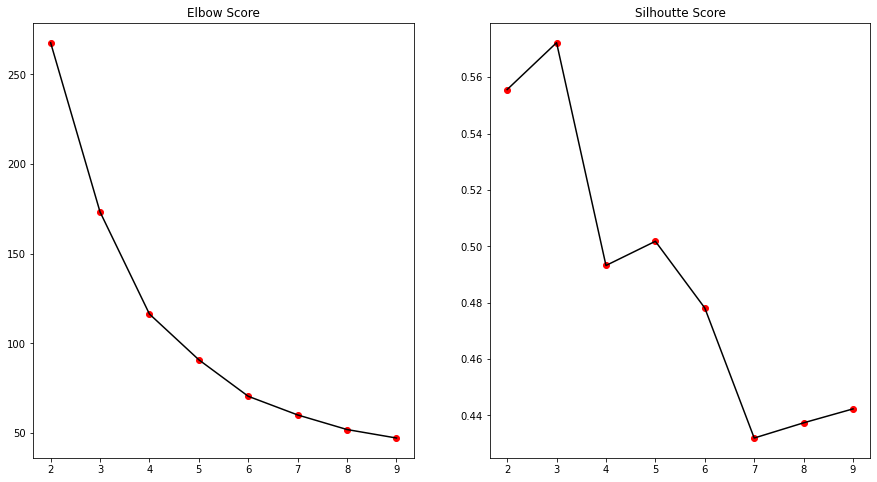

In [617]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.title('Elbow Score')
                    
plt.subplot(1,2,2)
plt.plot(nc,silscore,color="black")
plt.scatter(nc,silscore,color="red")
plt.title('Silhoutte Score')

Conclusion:-

Optimal number of clustering we get is 3 in K-Means by seeing silhoutte score and elbow method


# 3.DBSCAN

In [622]:
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718


In [702]:
dbs=DBSCAN(eps=.1, min_samples=2)

In [703]:
labels=dbs.fit_predict(air_norm)

In [704]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [705]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [706]:
air["cluster id"]=labels

In [707]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [708]:
air.groupby(["cluster id"])["ID"].apply(lambda x:tuple(x))

cluster id
-1     (94, 380, 448, 502, 969, 977, 1089, 1143, 1189...
 0     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
 1                                      (245, 496, 2433)
 2                                           (513, 2345)
 3                                     (517, 1158, 2505)
 4                                     (575, 1304, 2071)
 5                                           (987, 3867)
 6                                          (1275, 2007)
 7                                          (1307, 4007)
 8                                          (1576, 2815)
 9                                          (2863, 3835)
 10                                         (3720, 3770)
Name: ID, dtype: object

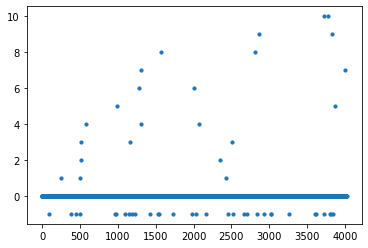

In [709]:
plt.scatter(air["ID"],air["cluster id"],s=10)